<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing\_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


***


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [1]:
pip install jupyter-dash

     |████████████████████████████████| 8.5 MB 5.3 MB/s 
     |████████████████████████████████| 357 kB 56.9 MB/s 
  Created wheel for dash-core-components: filename=dash_core_components-2.0.0-py3-none-any.whl size=3822 sha256=a181ba64877e9fc896c9abecfdc9d51138b39c29984624ba0b1f1cc65488a7e0
  Stored in directory: /root/.cache/pip/wheels/00/f9/c7/1a6437d794ed753ea9bc9079e761d4fc803a1f1f5d3697b9ec
  Created wheel for dash-html-components: filename=dash_html_components-2.0.0-py3-none-any.whl size=4090 sha256=f69cd4b2050ebc9a969b399feb97c4c99069e91497b0c14bf8623d0fe57979fa
  Stored in directory: /root/.cache/pip/wheels/ec/6b/81/05aceabd8b27f724e2c96784016287cc1bfbc349ebfda451de
  Created wheel for dash-table: filename=dash_table-5.0.0-py3-none-any.whl size=3912 sha256=56f2790d5260abcfeb31f8971fb4c497fc9173fe52547da74534cd73328c050a
  Stored in directory: /root/.cache/pip/wheels/85/5d/4e/7c276b57992951dbe770bf5caad6448d0539c510663aefd2e2
  Created wheel for retrying: filename=retrying-1.3.3

In [2]:
# andas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [58]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')
for i , data in enumerate (df["Date"]):
   df.loc[i,'Year'] = data.split("-")[0]



df.head(5)


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013


### Success Rate 

In [78]:
success_df =  df.groupby(['Year'] , as_index= False )['Class'].mean()
years = success_df['Year'].to_list()
success_df = success_df.tail(8) 
# success_df.reset_index()
success_df.rename(columns={'Class':'Success_Rate'},inplace=True )

In [79]:
rate = success_df
rate['Failure_Rate'] = 1 - success_df['Success_Rate'] 
rate

,Year,Success_Rate,Failure_Rate
2,2013,0.000000,1.000000
3,2014,0.333333,0.666667
4,2015,0.333333,0.666667
5,2016,0.625000,0.375000
6,2017,0.833333,0.166667
7,2018,0.611111,0.388889
8,2019,0.900000,0.100000
9,2020,0.842105,0.157895


In [4]:
for i in range(len(df['Class'])):
  if df.loc[i,'Class'] == 0:
    df.loc[i,'Class_Color'] = 'purple'
  elif  df.loc[i,'Class'] == 1:
    df.loc[i,'Class_Color'] = 'orange' 
df['Class_Color']

0     purple
1     purple
2     purple
3     purple
4     purple
       ...  
85    orange
86    orange
87    orange
88    orange
89    orange
Name: Class_Color, Length: 90, dtype: object

In [5]:
#Substring Search In Pandas Columns
df['LaunchSite'] = df['LaunchSite'].astype('string')

z = df[ df['LaunchSite'].str.contains('KSC')  ] 
z[:5]

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year,Class_Color
26,27,2017-02-19,Falcon 9,2490.000000,ISS,KSC LC 39A,True RTLS,1,True,False,True,5e9e3032383ecb267a34e7c7,3.0,1,B1031,-80.603956,28.608058,1,2017,orange
27,28,2017-03-16,Falcon 9,5600.000000,GTO,KSC LC 39A,None None,1,False,False,False,NaN,3.0,0,B1030,-80.603956,28.608058,0,2017,purple
28,29,2017-03-30,Falcon 9,5300.000000,GTO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,2.0,1,B1021,-80.603956,28.608058,1,2017,orange
29,30,2017-05-01,Falcon 9,6104.959412,LEO,KSC LC 39A,True RTLS,1,True,False,True,5e9e3032383ecb267a34e7c7,3.0,1,B1032,-80.603956,28.608058,1,2017,orange
30,31,2017-05-15,Falcon 9,6070.000000,GTO,KSC LC 39A,None None,1,False,False,False,NaN,3.0,0,B1034,-80.603956,28.608058,0,2017,purple


In [6]:
# Booster Carried Max Payload
df.sort_values('PayloadMass' , ascending=False )

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year,Class_Color
68,69,2019-11-11,Falcon 9,15600.0,VLEO,CCAFS SLC 40,True ASDS,4,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,4,B1048,-80.577366,28.561857,1,2019,orange
73,74,2020-01-29,Falcon 9,15600.0,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.577366,28.561857,1,2020,orange
76,77,2020-03-18,Falcon 9,15600.0,VLEO,KSC LC 39A,False ASDS,5,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,4,B1048,-80.603956,28.608058,0,2020,purple
71,72,2020-01-07,Falcon 9,15400.0,VLEO,CCAFS SLC 40,True ASDS,4,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1049,-80.577366,28.561857,1,2020,orange
80,81,2020-06-13,Falcon 9,15400.0,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,3,B1059,-80.577366,28.561857,1,2020,orange
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,18,2016-01-17,Falcon 9,553.0,PO,VAFB SLC 4E,False ASDS,1,True,False,True,5e9e3033383ecbb9e534e7cc,1.0,0,B1017,-120.610829,34.632093,0,2016,purple
1,2,2012-05-22,Falcon 9,525.0,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012,purple
3,4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013,purple
36,37,2017-08-24,Falcon 9,475.0,SSO,VAFB SLC 4E,True ASDS,1,True,False,True,5e9e3033383ecbb9e534e7cc,3.0,1,B1038,-120.610829,34.632093,1,2017,orange


In [7]:


df['Year'] = df['Year'].astype('int') 
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         string
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
Class               int64
Year                int64
Class_Color        object
dtype: object

In [8]:
two17 = df[df['Year'] == 2017 ] 
two17 = two17[two17['Class'] == 1  ]
two17[['Date','LaunchSite', 'BoosterVersion','Longitude','Latitude']]

,Date,LaunchSite,BoosterVersion,Longitude,Latitude
25,2017-01-14,VAFB SLC 4E,Falcon 9,-120.610829,34.632093
26,2017-02-19,KSC LC 39A,Falcon 9,-80.603956,28.608058
28,2017-03-30,KSC LC 39A,Falcon 9,-80.603956,28.608058
29,2017-05-01,KSC LC 39A,Falcon 9,-80.603956,28.608058
31,2017-06-03,KSC LC 39A,Falcon 9,-80.603956,28.608058
32,2017-06-23,KSC LC 39A,Falcon 9,-80.603956,28.608058
33,2017-06-25,VAFB SLC 4E,Falcon 9,-120.610829,34.632093
35,2017-08-14,KSC LC 39A,Falcon 9,-80.603956,28.608058
36,2017-08-24,VAFB SLC 4E,Falcon 9,-120.610829,34.632093
37,2017-09-07,KSC LC 39A,Falcon 9,-80.603956,28.608058


In [9]:
# Changing date type to Pandas Date time 
df['Date'] = pd.to_datetime(df['Date'])  
df.dtypes

# Start Date And End Date
start_date = '2010-06-04'
end_date = '2017-03-20'
mask = (df['Date'] >= start_date ) & (df['Date'] <= end_date  ) & (df['Class'] == 1 )
outcomes_10_17 = df.loc[mask]
# Counting By Year To Show Them In Descending Order
outcomes_10_17_rank = outcomes_10_17.groupby('Year')['Outcome'].count()
# it returned us a series converting back into Data Frame
outcomes_10_17_rank =  pd.DataFrame(outcomes_10_17_rank)
outcomes_10_17_rank.sort_values('Outcome' , ascending=False)


,Outcome
Year,
2016,5
2014,2
2015,2
2017,2


In [ ]:
df_drop_na = df[df['Class'] == 1 ]

df_drop_na[['Date','Class', 'LandingPad']].dropna()

In [ ]:
df_drop_na['PayloadMass'].astype('int')

In [12]:

df_payloadrange =  df_drop_na[df_drop_na['PayloadMass'] >= 4000 ] 
df_payloadrange = df_payloadrange[df_payloadrange['PayloadMass'] <= 6000 ] 
df_payloadrange[['FlightNumber','Date','BoosterVersion','PayloadMass','Orbit','LaunchSite' ,'Outcome']].dropna()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome
20,21,2016-05-06,Falcon 9,4696.0,GTO,CCAFS SLC 40,True ASDS
23,24,2016-08-14,Falcon 9,4600.0,GTO,CCAFS SLC 40,True ASDS
28,29,2017-03-30,Falcon 9,5300.0,GTO,KSC LC 39A,True ASDS
37,38,2017-09-07,Falcon 9,4990.0,LEO,KSC LC 39A,True RTLS
39,40,2017-10-11,Falcon 9,5200.0,GTO,KSC LC 39A,True ASDS
44,45,2018-01-31,Falcon 9,4230.0,GTO,CCAFS SLC 40,True Ocean
54,55,2018-08-07,Falcon 9,5800.0,GTO,CCAFS SLC 40,True ASDS
58,59,2018-12-03,Falcon 9,4000.0,SSO,VAFB SLC 4E,True ASDS
69,70,2019-12-05,Falcon 9,5000.0,ISS,CCAFS SLC 40,True ASDS


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


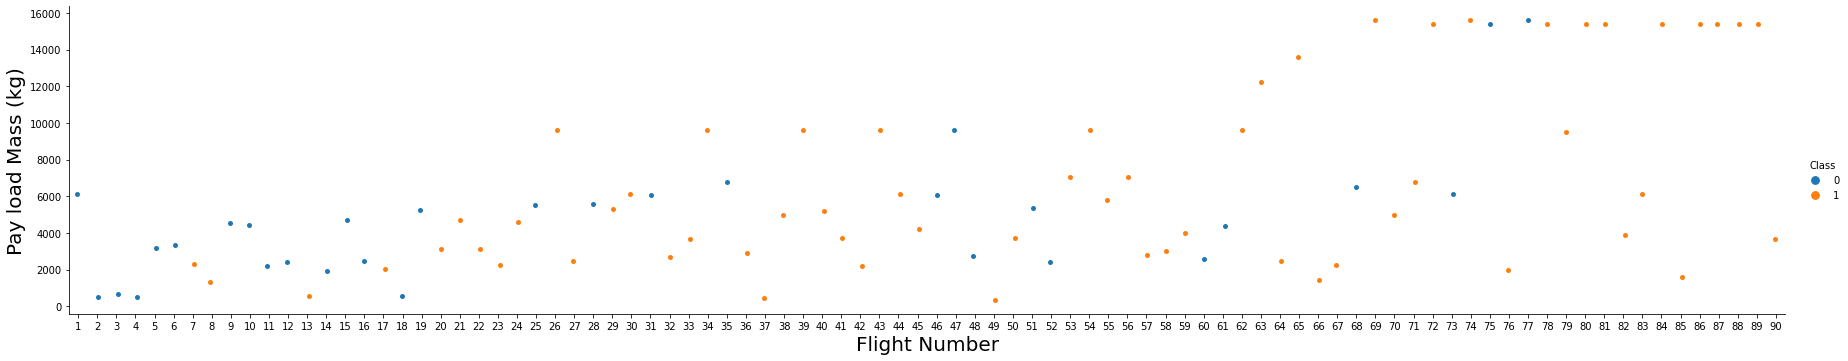

In [13]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

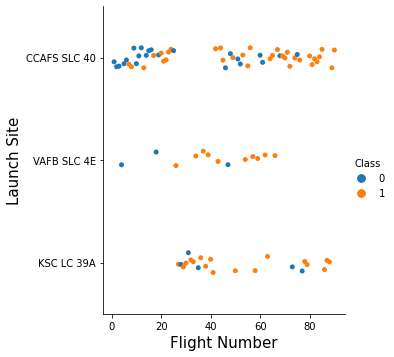

In [14]:
sns.catplot(y="LaunchSite",x="FlightNumber",hue="Class", data=df, aspect = 1) 
plt.ylabel("Launch Site",fontsize=15) 
plt.xlabel("Flight Number",fontsize=15) 
plt.show()

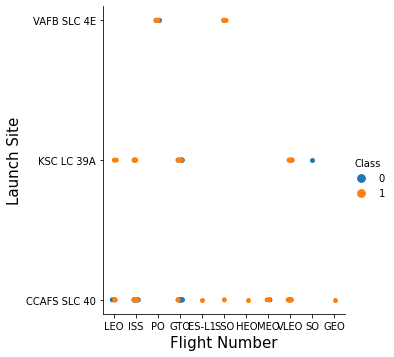

In [15]:
sns.catplot(y="LaunchSite",x="Orbit",hue="Class", data=df, aspect = 1) 
plt.ylabel("Launch Site",fontsize=15) 
plt.xlabel("Flight Number",fontsize=15) 
plt.show()

In [16]:
 #Orbits, LaunchSite, LandingPad and Serial 
#print(df['Orbit'].unique()) , 
#print(df['LaunchSite'].unique()) ,
#print(df['LandingPad'].unique()) ,
print(df['Serial'].unique())

['B0003' 'B0005' 'B0007' 'B1003' 'B1004' 'B1005' 'B1006' 'B1007' 'B1008'
 'B1011' 'B1010' 'B1012' 'B1013' 'B1015' 'B1016' 'B1018' 'B1019' 'B1017'
 'B1020' 'B1021' 'B1022' 'B1023' 'B1025' 'B1026' 'B1028' 'B1029' 'B1031'
 'B1030' 'B1032' 'B1034' 'B1035' 'B1036' 'B1037' 'B1039' 'B1038' 'B1040'
 'B1041' 'B1042' 'B1043' 'B1044' 'B1045' 'B1046' 'B1047' 'B1048' 'B1049'
 'B1050' 'B1054' 'B1051' 'B1056' 'B1059' 'B1058' 'B1060' 'B1062']


14
3
5
53

In [17]:
print(len(df['Orbit'].unique())) , 
print(len(df['LaunchSite'].unique())) ,
print(len(df['LandingPad'].unique())) ,
print(len(df['Serial'].unique()))

11
3
6
53


In [18]:
len(df)

90

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


In [19]:
failed_df = df[df['Class'] !=  1 ]
stage_2_df = df[df['Class'] !=  0 ]

Success DataFrame

In [20]:
orbit_df = stage_2_df.groupby('Orbit' , as_index= False , sort=True )['Class'].count()
year_df =  stage_2_df.groupby([ 'Year' , 'Orbit'] , as_index= False )['Class'].count()
payload_mass_df = stage_2_df.groupby([ 'Year' , 'Orbit', 'Class'], as_index= False )['PayloadMass'].mean()



In [21]:
orbit_df.sort_values('Class' , ascending=False)   

,Orbit,Class
2,GTO,14
4,ISS,13
9,VLEO,12
7,PO,6
5,LEO,5
8,SSO,5
6,MEO,2
0,ES-L1,1
1,GEO,1
3,HEO,1


Failed DataFrame

In [22]:
failed_orbitdf = failed_df.groupby('Orbit' , as_index= False , sort=True )['Class'].count()
print(sum(failed_orbitdf['Class']))
failed_orbitdf.sort_values('Class' , ascending=False)   


30


,Orbit,Class
0,GTO,13
1,ISS,8
4,PO,3
2,LEO,2
6,VLEO,2
3,MEO,1
5,SO,1


All PayLoad Mass Average 

In [23]:
payload_mass_all = df.groupby([ 'Year' , 'Orbit', 'Class'], as_index= False )['PayloadMass'].mean()
payload_mass_all

,Year,Orbit,Class,PayloadMass
0,2010,LEO,0,6104.959412
1,2012,LEO,0,525.000000
2,2013,GTO,0,3170.000000
3,2013,ISS,0,677.000000
4,2013,PO,0,500.000000
5,2014,GTO,0,4096.000000
6,2014,ISS,0,2216.000000
7,2014,ISS,1,2296.000000
8,2014,LEO,1,1316.000000
9,2015,ES-L1,1,570.000000


Mean Mass Of PayLoads For Each Orbit Successful Launches 

In [24]:
payload_mass_stage2 = stage_2_df.groupby([ 'Orbit' ], as_index= False )['PayloadMass'].mean()
payload_mass_stage2

,Orbit,PayloadMass
0,ES-L1,570.000000
1,GEO,6104.959412
2,GTO,4855.785714
3,HEO,350.000000
4,ISS,3959.438462
5,LEO,4109.983765
6,MEO,3780.500000
7,PO,9600.000000
8,SSO,2060.000000
9,VLEO,15285.000000


Launch Site Success And Failure Counts For All Orbits And Launch Sites

*Count Column Display Record Number For How Many Times A Launch Is Performed For A Particular Orbit At A Particular Launch Site And Also Shows It's Outcome In Outcome Column *
 

*  0 means Failed
*  1 means Passed






In [25]:
orbit_df_all = df
orbit_df_all['Outcome'] = orbit_df_all['Class']

# Counts Record And Give A Number For How Many Times A Launch Is Performed
orbit_df_all = df.groupby(['Orbit' , 'Outcome', 'LaunchSite', 'PayloadMass', 'Class_Color','FlightNumber'] , as_index= False , sort=True )['Class'].count()
orbit_df_all.sort_values('Class' , ascending=False)
orbit_df_all


,Orbit,Outcome,LaunchSite,PayloadMass,Class_Color,FlightNumber,Class
0,ES-L1,1,CCAFS SLC 40,570.000000,orange,13,1
1,GEO,1,CCAFS SLC 40,6104.959412,orange,83,1
2,GTO,0,CCAFS SLC 40,3170.000000,purple,5,1
3,GTO,0,CCAFS SLC 40,3325.000000,purple,6,1
4,GTO,0,CCAFS SLC 40,4428.000000,purple,10,1
...,...,...,...,...,...,...,...
85,VLEO,1,CCAFS SLC 40,15600.000000,orange,74,1
86,VLEO,1,KSC LC 39A,15400.000000,orange,78,1
87,VLEO,1,KSC LC 39A,15400.000000,orange,86,1
88,VLEO,1,KSC LC 39A,15400.000000,orange,87,1


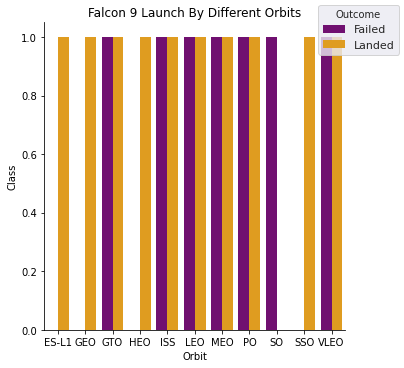

In [26]:
import seaborn as sns 
g = sns.catplot(x='Orbit', y='Class', hue='Outcome', 
                         data=orbit_df_all , palette=['purple','orange'] , kind='bar').set(title='Falcon 9 Launch By Different Orbits')
sns.set(rc={'figure.figsize':(25,20)}) 
sns.move_legend(g, "upper right")
# sns.set(rc={'figure.figsize':(15,10)}) 

new_labels = ['Failed', 'Landed']

for t, l in zip(g._legend.texts, new_labels):
     t.set_text(l)



In [27]:
site_success = df.groupby('LaunchSite' , as_index= False )['Class'].mean()
# = ['CCAFS SLC 40', 'KSC LC 39A','VAFB SLC 4E	']
total =  sum(site_success['Class'])
site_success['Percentage'] =  site_success['Class'].map(lambda x : (x/total)*100 )
labels = site_success['LaunchSite'].to_list()
site_success

,LaunchSite,Class,Percentage
0,CCAFS SLC 40,0.600000,28.011753
1,KSC LC 39A,0.772727,36.075743
2,VAFB SLC 4E,0.769231,35.912504


In [28]:
site_count = df.groupby('LaunchSite' , as_index= False )['Class'].count()
z = stage_2_df.groupby('LaunchSite' , as_index= False )['Class'].count()
site_count.rename(columns={'Class':'total_launches'}, inplace=True)
site_count['success_launches'] = z['Class']
site_count['fail_launches'] = site_count['total_launches'] - site_count['success_launches']
site_count['success_ratio'] = site_count['success_launches'] /site_count['total_launches'] 
site_count

,LaunchSite,total_launches,success_launches,fail_launches,success_ratio
0,CCAFS SLC 40,55,33,22,0.600000
1,KSC LC 39A,22,17,5,0.772727
2,VAFB SLC 4E,13,10,3,0.769231


In [29]:
ksc_ = stage_2_df[stage_2_df['LaunchSite'].str.contains('KSC') ] 
ksc_ = ksc_.groupby('Orbit')['Class'].count()
ksc_ = pd.DataFrame(ksc_)
ksc_

,Class
Orbit,
GTO,6
ISS,5
LEO,2
VLEO,4


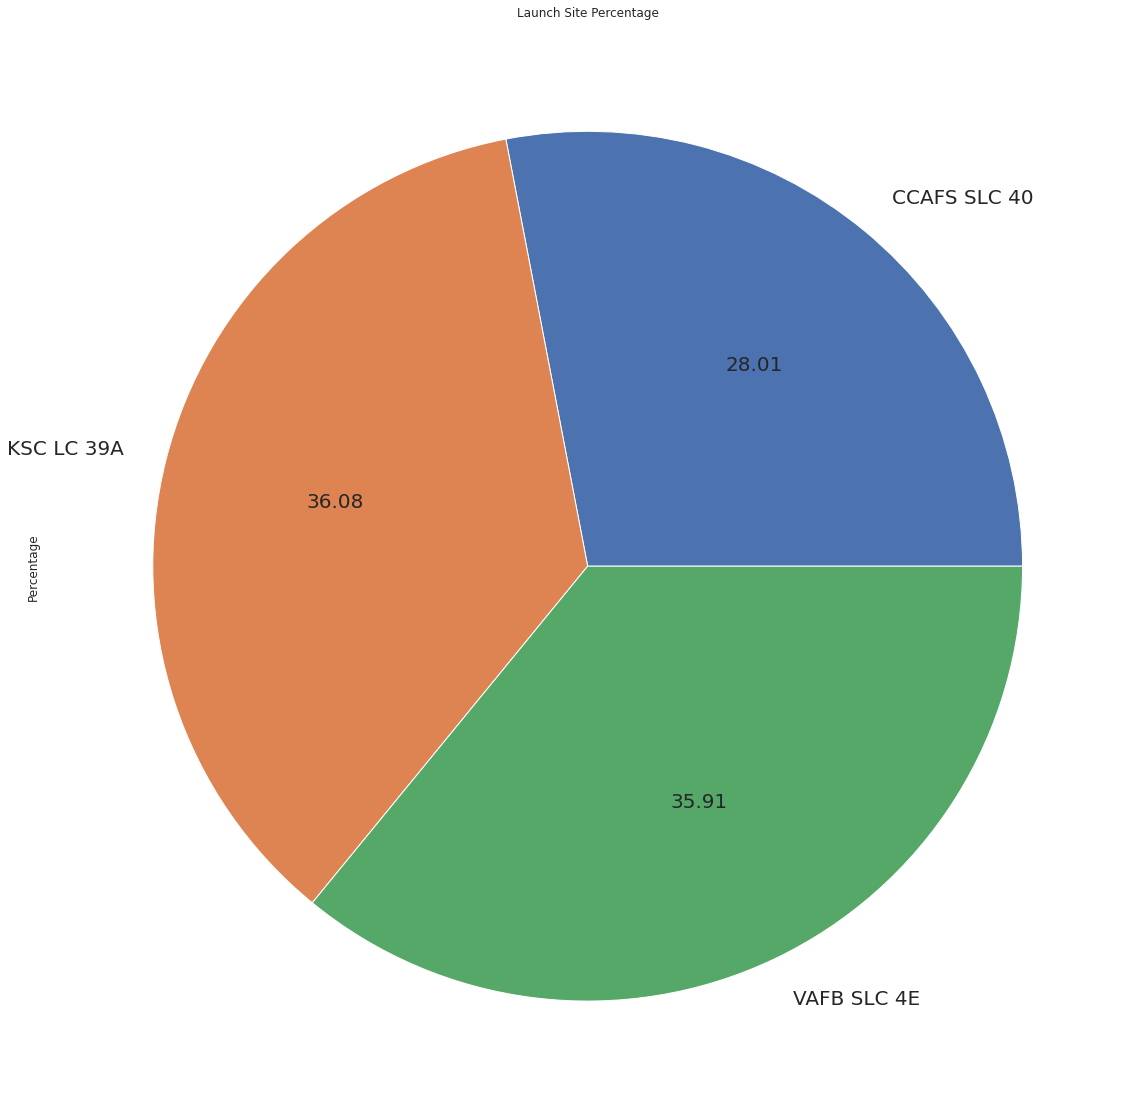

In [30]:
site_success['Percentage'].plot(kind='pie' , autopct='%.2f', labels=labels , title='Launch Site Percentage', fontsize=20 )

### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


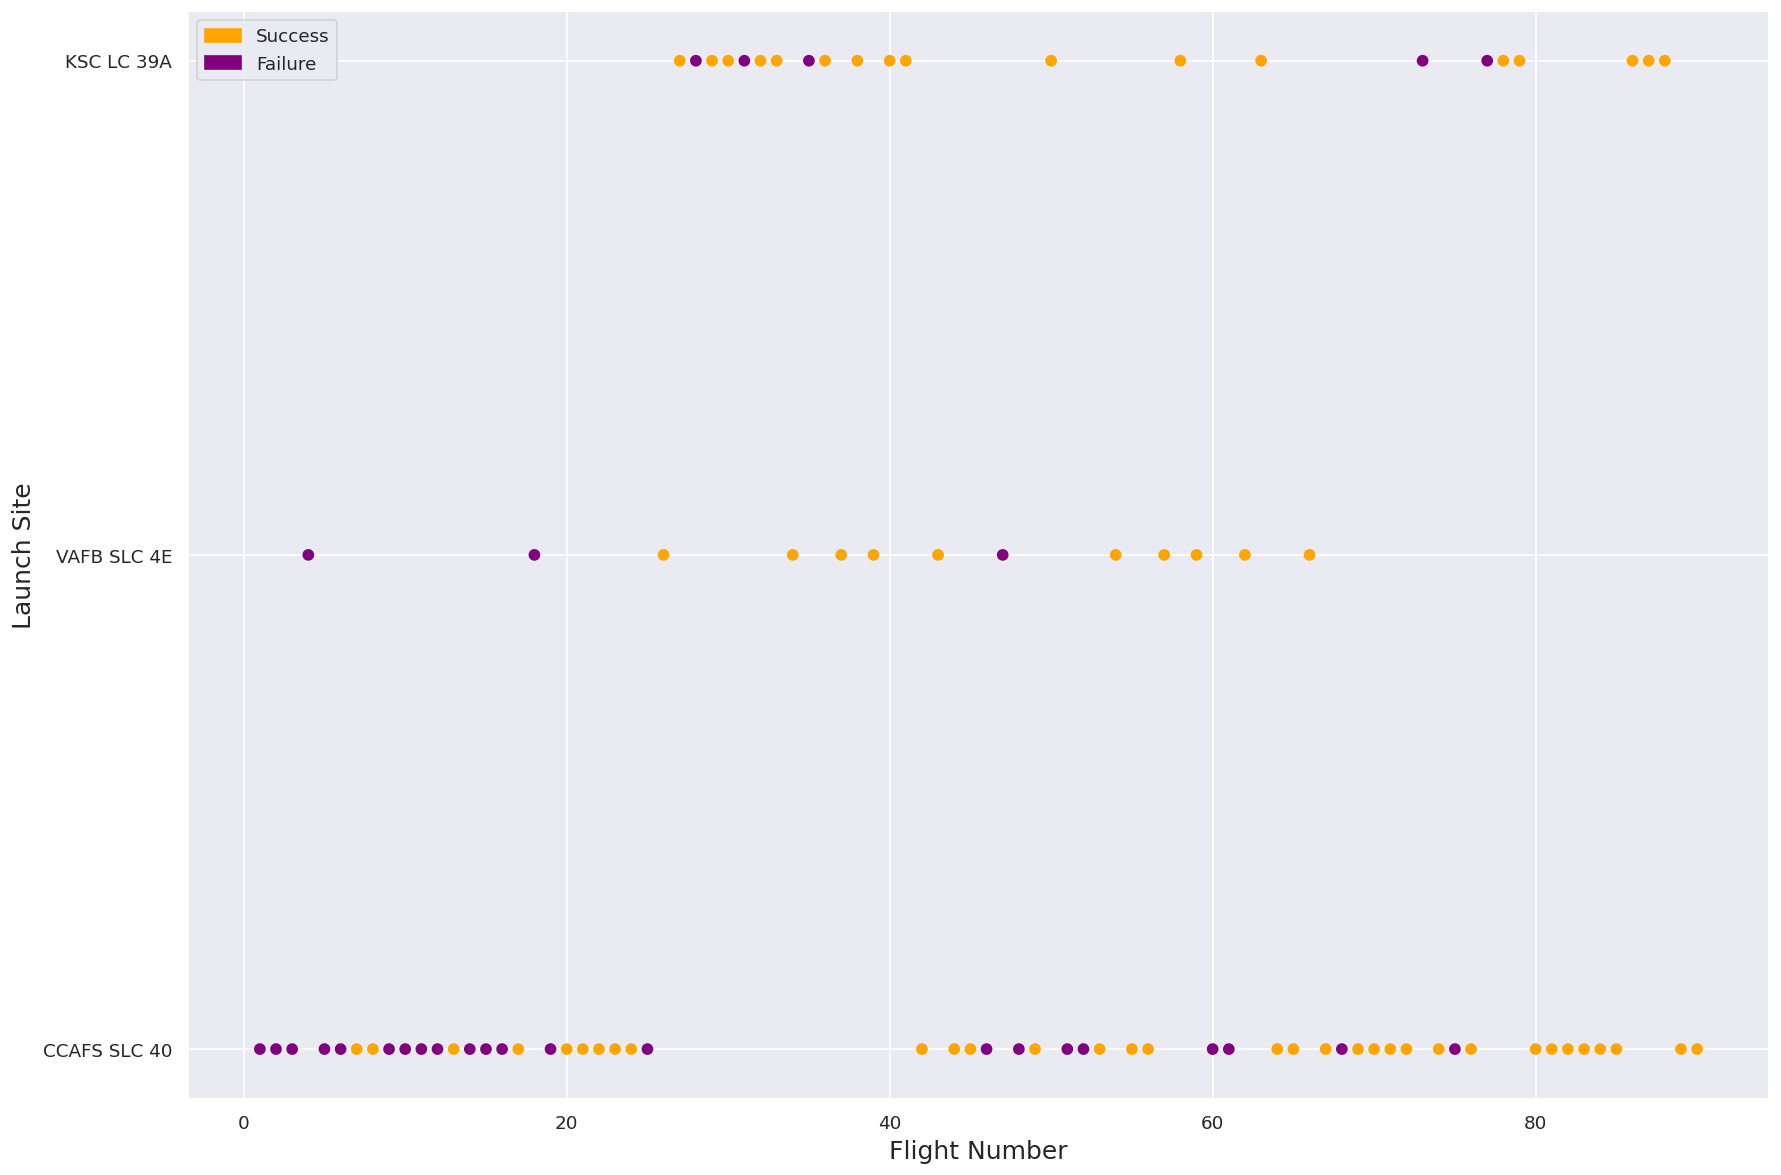

In [31]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
import matplotlib.patches as mpatches
orange_patch = mpatches.Patch(color='orange', label='Success')
purple_patch = mpatches.Patch(color='purple', label='Failure')
#sns.catplot(y="LaunchSite",x="FlightNumber",hue="Class", data=df, aspect = 1) 
plt.figure(figsize=(17, 12), dpi=120 )
plt.scatter(  df['FlightNumber'] , df['LaunchSite'] , color=df['Class_Color'] )
plt.ylabel("Launch Site",fontsize=15) 
plt.xlabel("Flight Number",fontsize=15) 
plt.legend(handles=[orange_patch, purple_patch])

# for spine in plt.gca().spines.values():
#     spine.set_visible(False)
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


### TASK 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


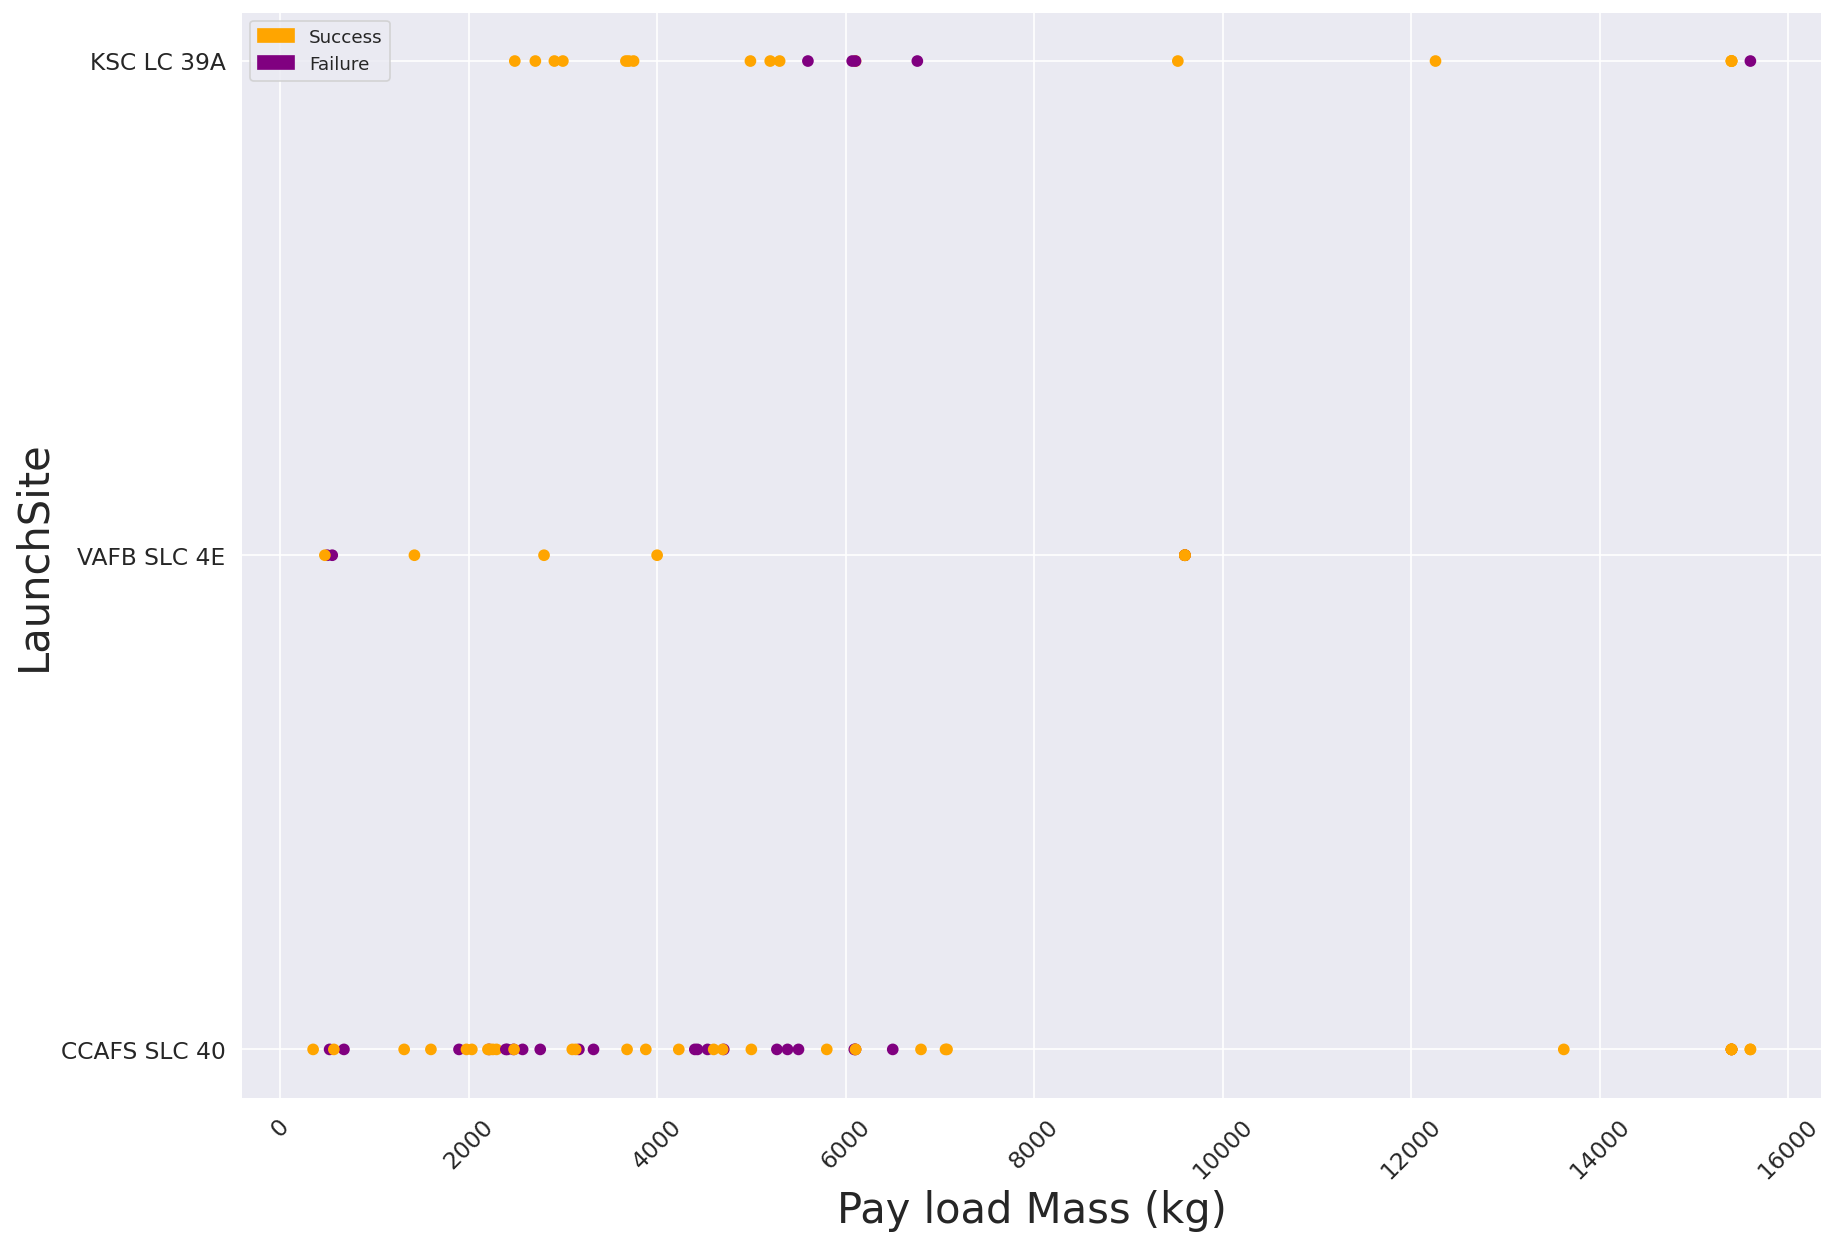

In [32]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
#sns.catplot(y="PayloadMass",x="FlightNumber",hue="Class", data=df, aspect = 1) 
import matplotlib.patches as mpatches



plt.figure(figsize=(17, 12), dpi=120 )
plt.scatter(  df['PayloadMass'] , df['LaunchSite'] , color=df['Class_Color'] )
plt.xlabel("Pay load Mass (kg)",fontsize=25) 
plt.ylabel("LaunchSite",fontsize=25)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
orange_patch = mpatches.Patch(color='orange', label='Success')
purple_patch = mpatches.Patch(color='purple', label='Failure')

plt.legend(handles=[orange_patch, purple_patch])


# for spine in plt.gca().spines.values():
#   spine.set_visible(False)
plt.show()  

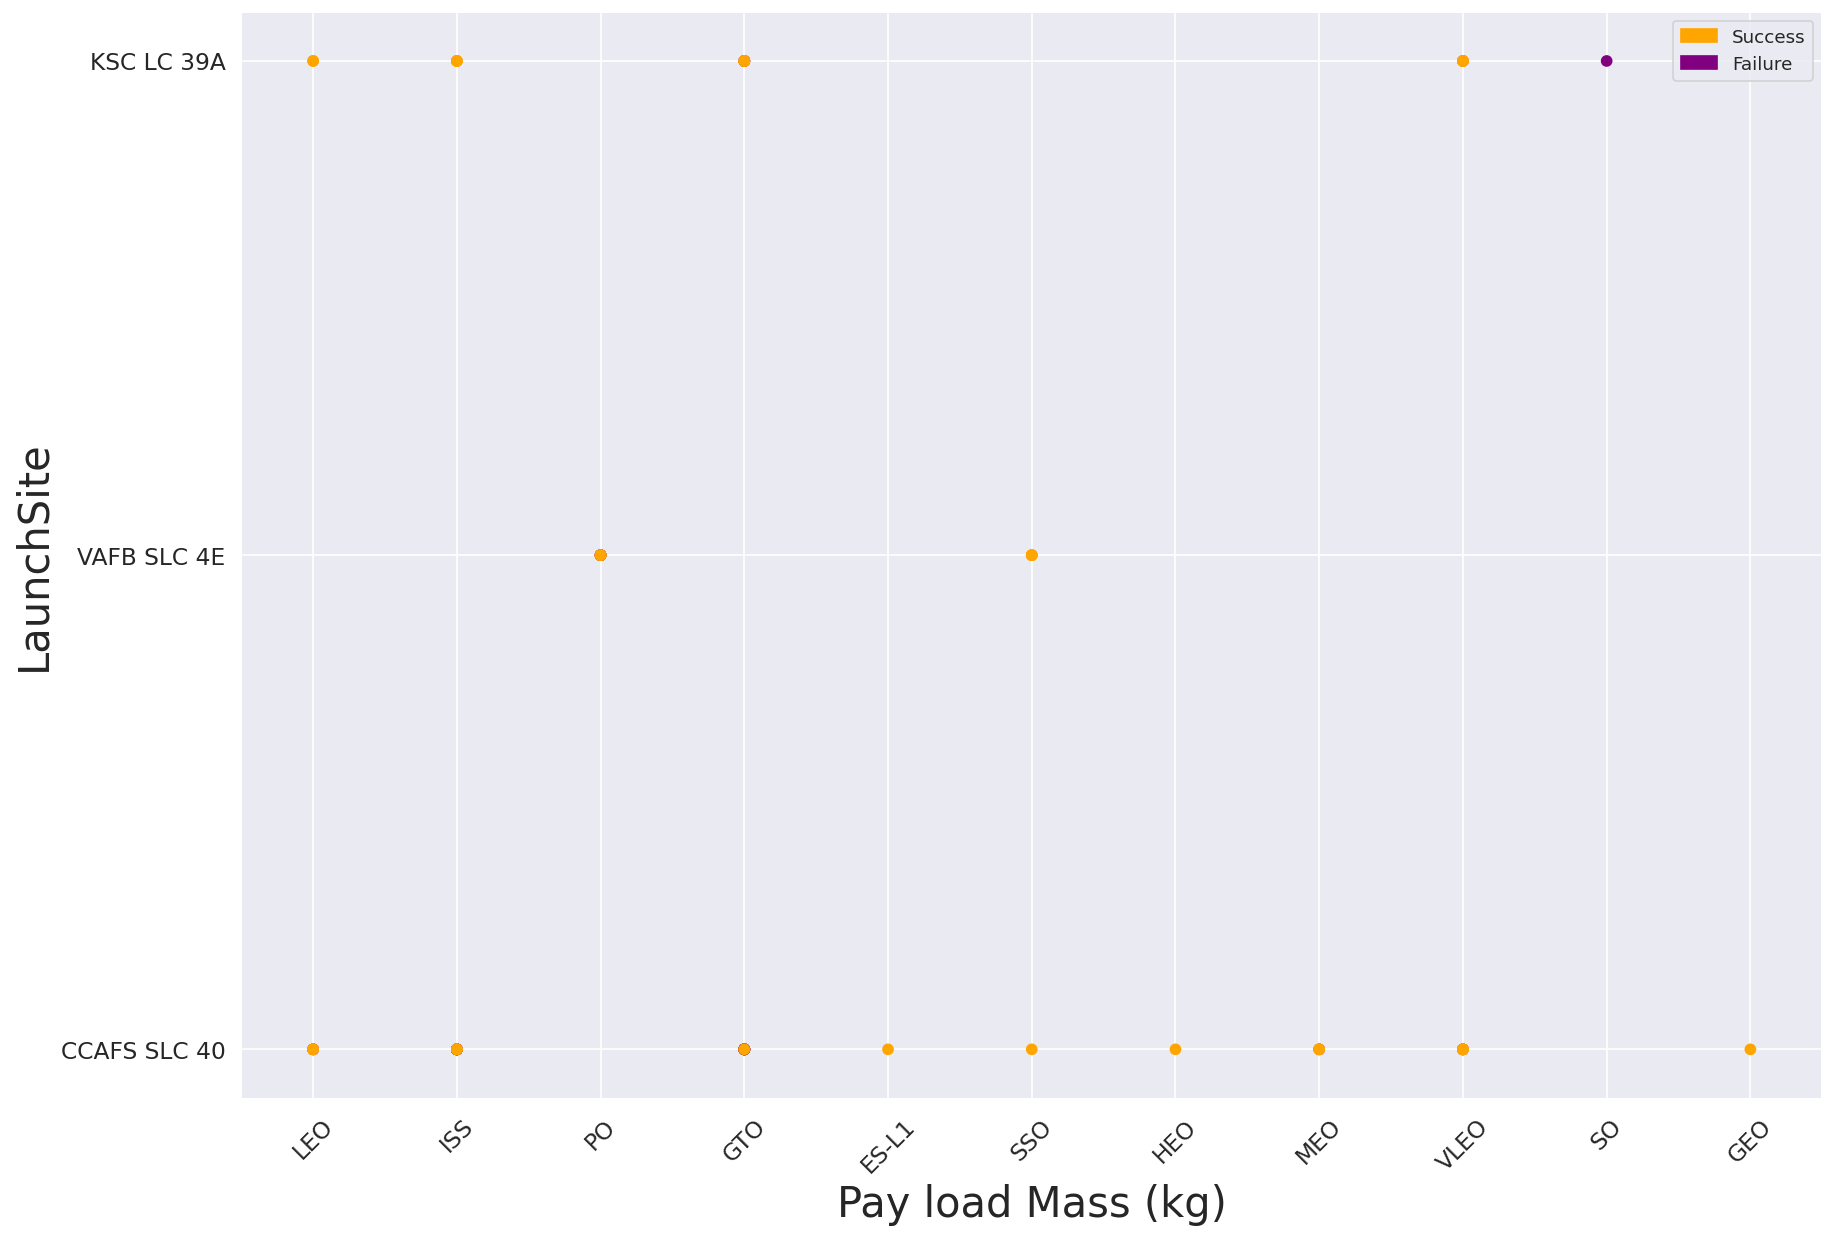

In [33]:
import matplotlib.patches as mpatches



plt.figure(figsize=(17, 12), dpi=120 )
plt.scatter(  df['Orbit'] , df['LaunchSite'] , color=df['Class_Color'] )
plt.xlabel("Pay load Mass (kg)",fontsize=25) 
plt.ylabel("LaunchSite",fontsize=25)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
orange_patch = mpatches.Patch(color='orange', label='Success')
purple_patch = mpatches.Patch(color='purple', label='Failure')

plt.legend(handles=[orange_patch, purple_patch])


# for spine in plt.gca().spines.values():
#   spine.set_visible(False)
plt.show()  

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


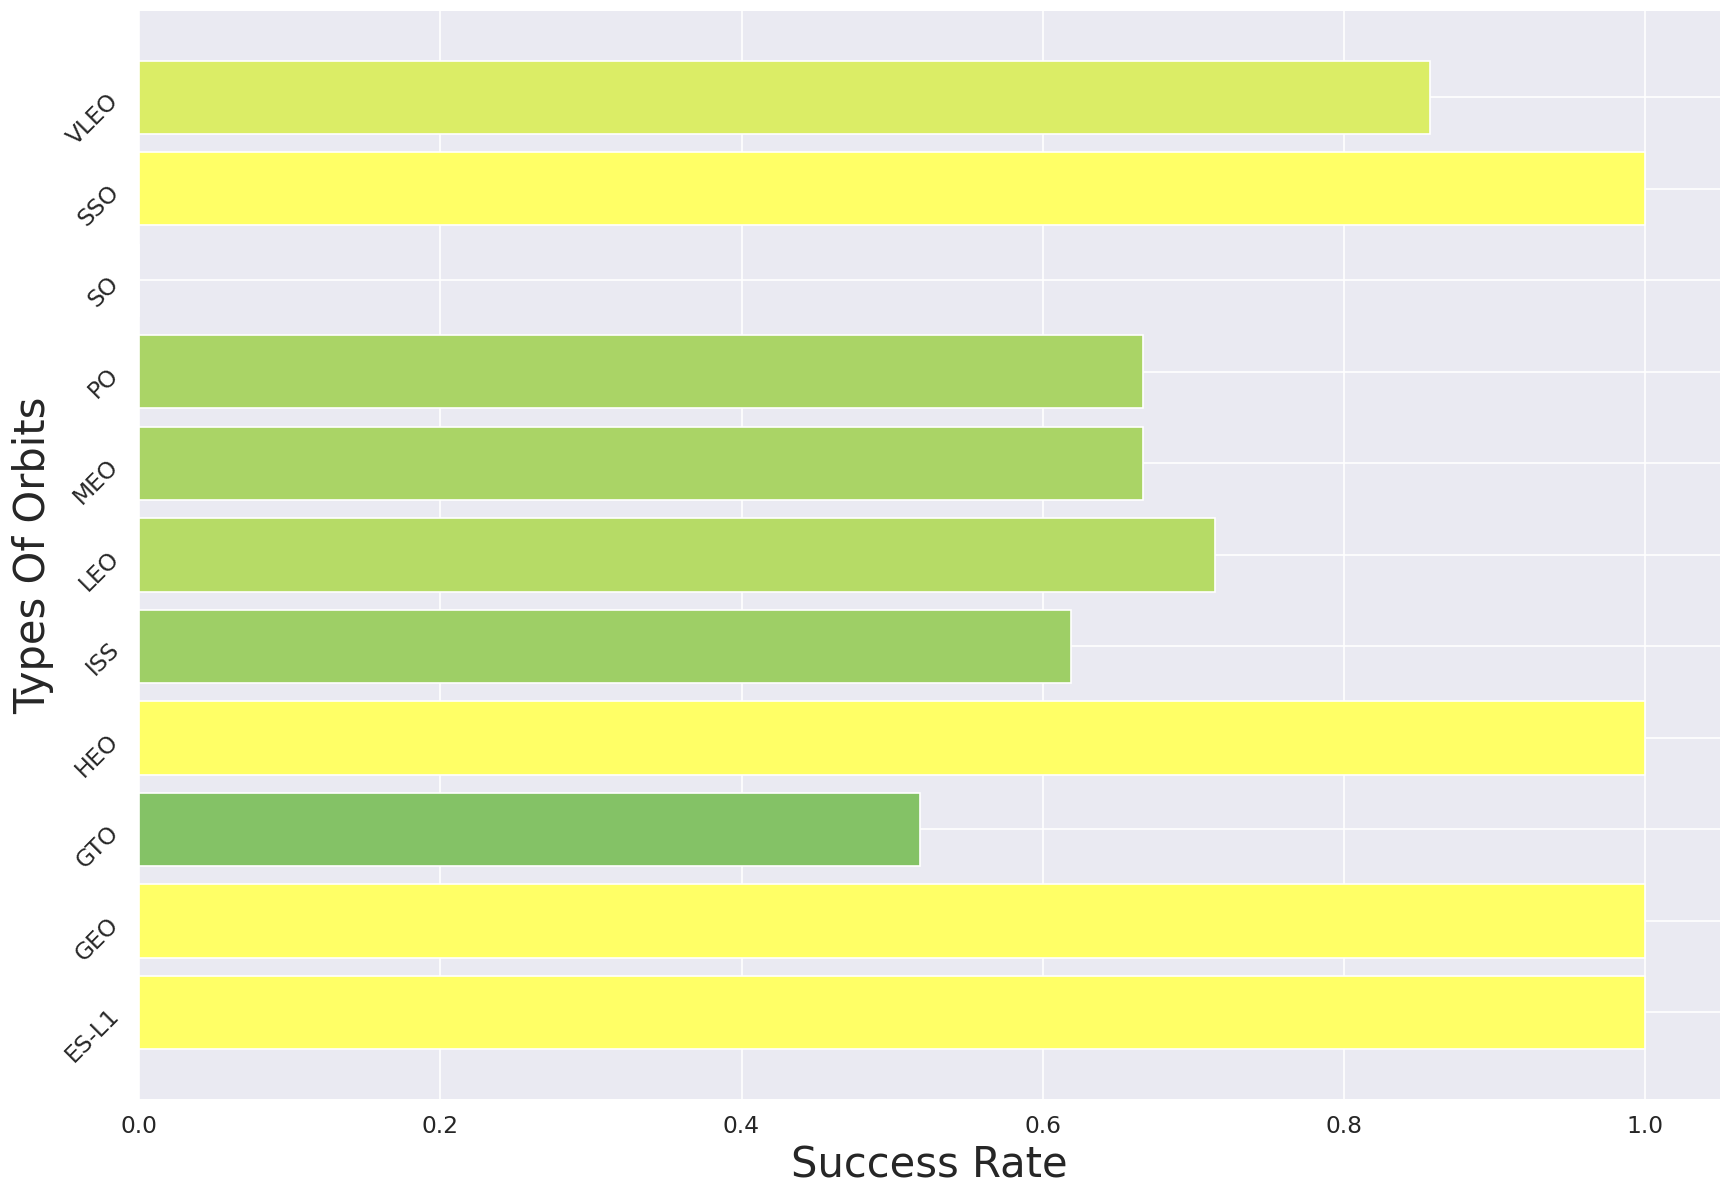

In [34]:
# HINT use groupby method on Orbit column and get the mean of Class column
success_df = df.groupby('Orbit' , as_index= False )['Class'].mean()
success_df.loc[8,'Class'] = 0.0001

plt.figure(figsize=(17, 12), dpi=120 )
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
my_cmap = plt.get_cmap("summer")

plt.barh( success_df['Orbit'], success_df['Class'] , color=my_cmap(rescale(success_df['Class'])) )
plt.xlabel("Success Rate",fontsize=25) 
plt.ylabel("Types Of Orbits",fontsize=25)
plt.yticks(fontsize=14, rotation=45)
plt.xticks(fontsize=14)

for spine in plt.gca().spines.values():
  spine.set_visible(False)
plt.show()  

Analyze the ploted bar chart try to find which orbits have high sucess rate.


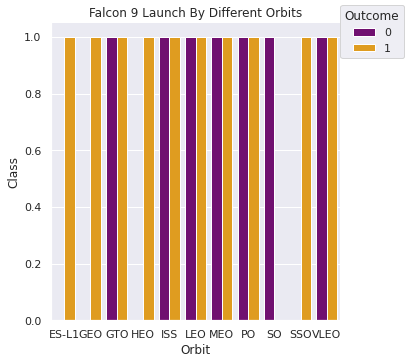

In [39]:
import seaborn as sns 
g = sns.catplot(x='Orbit', y='Class', hue='Outcome', 
                         data=orbit_df_all , palette=['purple','orange'] , kind='bar').set(title='Falcon 9 Launch By Different Orbits')
sns.move_legend(g, "upper right")
# sns.set(rc={'figure.figsize':(15,10)}) 

new_labels = ['Failed', 'Landed']

In [40]:
### CHANGE LEGEND LABELS AND TITLES
#
# new_labels = ['label 1', 'label 2']
# for t, l in zip(g._legend.texts, new_labels):
#     t.set_text(l)
#_____________________________________________

#   CHANGE FIGURE SIZE OF PLOT IN SEABORN ###
# import seaborn as sns

# sns.set(rc={'figure.figsize':(11.7,8.27)}) 
# ___________________________________________ 

### CHANGE LEGEND LOCATION 

# sns.move_legend(g, "lower right") 

FOR Legend Location 
upper right
upper left
lower left
lower right
right
center left
center right
lower center
upper center
center



In [41]:
# g = sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, markers=["o", "x"], facet_kws={'legend_out': True})

# # check axes and find which is have legend
# for ax in g.axes.flat:
#     leg = g.axes.flat[0].get_legend()
#     if not leg is None: break
# # or legend may be on a figure
# if leg is None: leg = g._legend

# # change legend texts
# new_title = 'My title'
# leg.set_title(new_title)
# new_labels = ['label 1', 'label 2']
# for t, l in zip(leg.texts, new_labels):
#     t.set_text(l)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

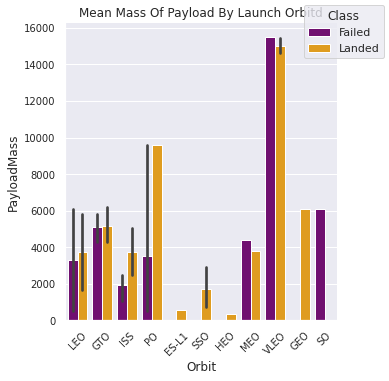

In [42]:
#payload_mass_all
import seaborn as sns 
g = sns.catplot(x='Orbit', y='PayloadMass', hue='Class', 
                data=payload_mass_all , palette=['purple','orange'] , kind='bar').set(title='Mean Mass Of Payload By Launch Orbitd')
sns.move_legend(g, "upper right")
sns.set(rc={'figure.figsize':(25,20)}) 

new_labels = ['Failed', 'Landed']


for t, l in zip(g._legend.texts, new_labels):
     t.set_text(l)

plt.yticks(fontsize=10)
plt.xticks(fontsize=10, rotation=45)


In [43]:
year_df =  stage_2_df.groupby([ 'Year' , 'Orbit'] , as_index= False )['Class'].count()
year_df

,Year,Orbit,Class
0,2014,ISS,1
1,2014,LEO,1
2,2015,ES-L1,1
3,2015,LEO,1
4,2016,GTO,3
5,2016,ISS,2
6,2017,GTO,4
7,2017,ISS,4
8,2017,LEO,2
9,2017,PO,4


In [44]:
orbit_df = stage_2_df.groupby('Orbit' , as_index= False , sort=True )['Class'].count()
print(sum(orbit_df['Class']))
orbit_df.sort_values('Class' , ascending=False)


60


,Orbit,Class
2,GTO,14
4,ISS,13
9,VLEO,12
7,PO,6
5,LEO,5
8,SSO,5
6,MEO,2
0,ES-L1,1
1,GEO,1
3,HEO,1


### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


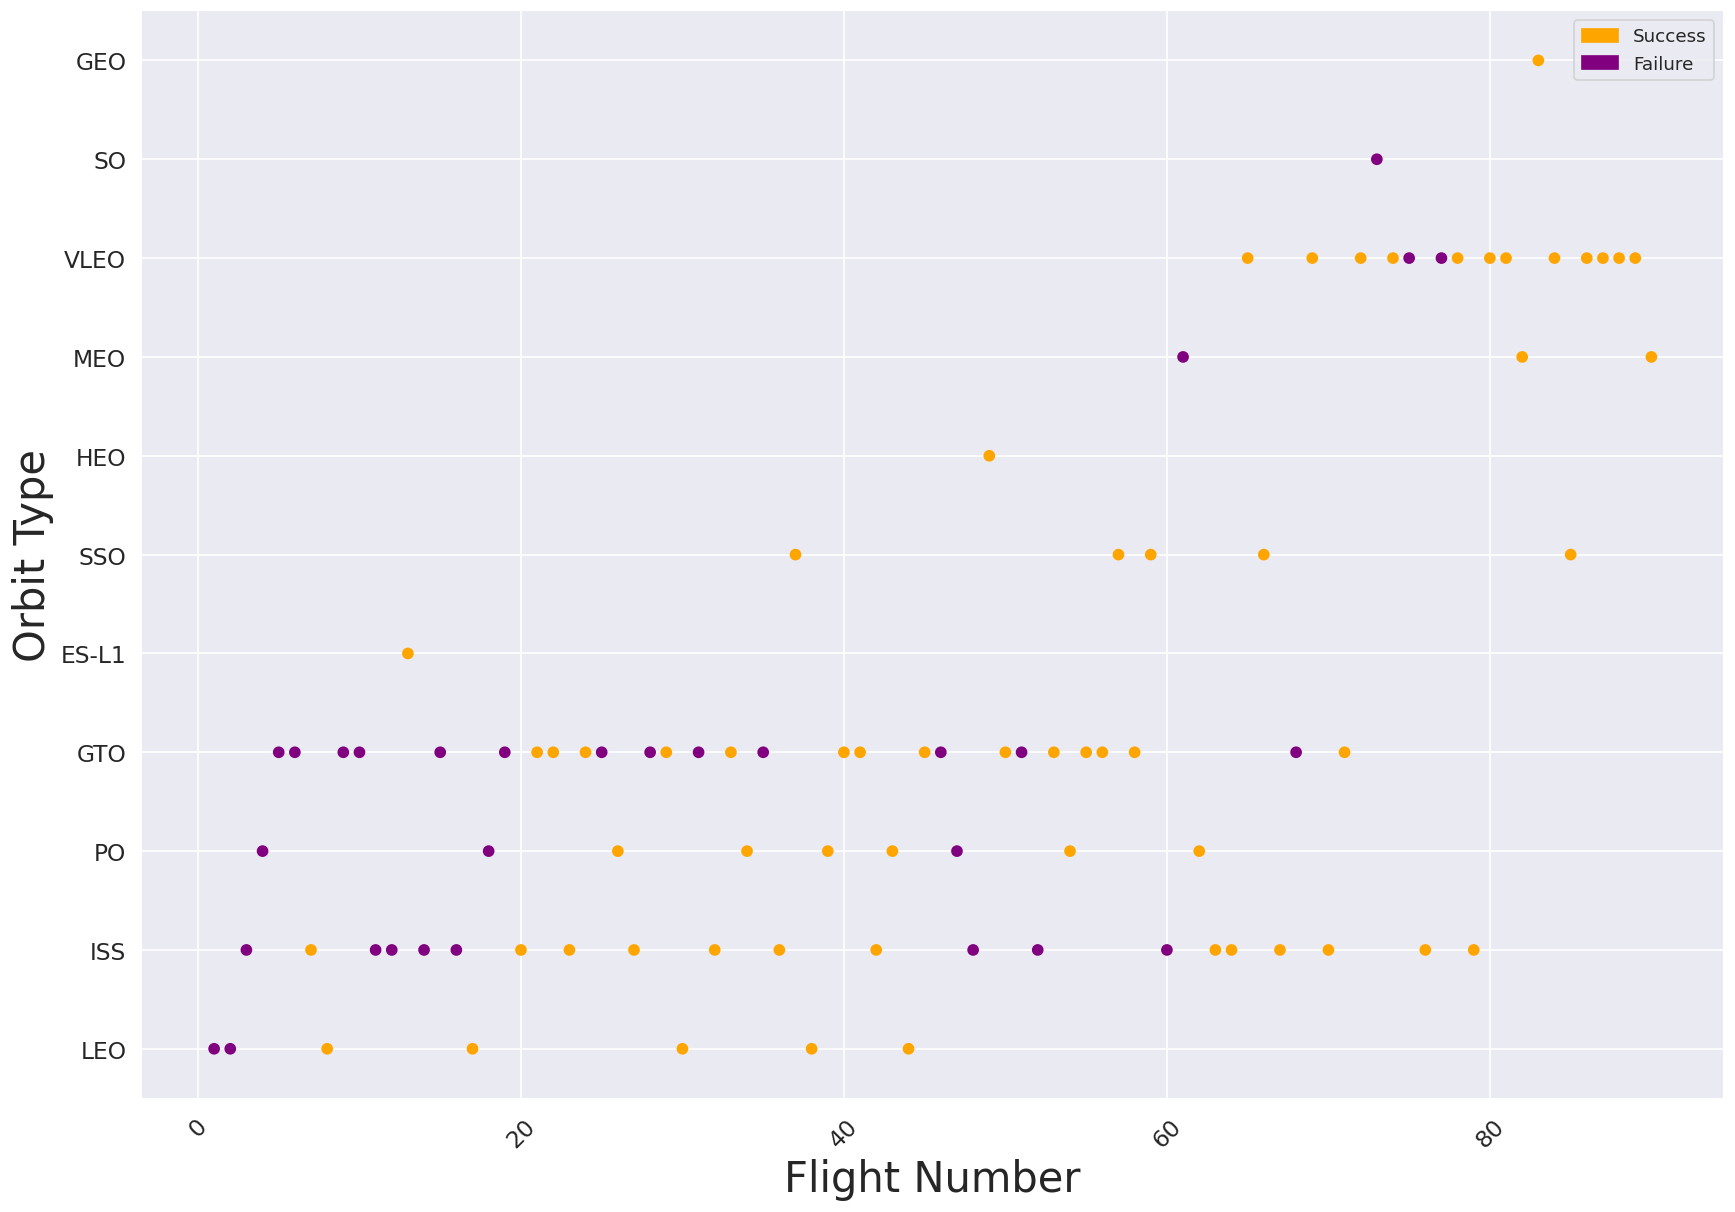

In [45]:
import matplotlib.pyplot as plt

# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
plt.figure(figsize=(17, 12), dpi=120 )
#rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
#color_list = [,]
color_list = [ 'blue' , 'orange']
def my_cmap(y) :
      for i , data in df.iterrows():
        return data
     
my_cmap(df['Class'])
#my_cmap = lambda y,lst : (if y==0 return lst[0] else return lst[1]  ) 

plt.scatter(  df['FlightNumber'] , df['Orbit'] , color=df['Class_Color'] )
#sns.catplot(y='Orbit' ,x="FlightNumber",hue="Class", data=df, aspect = 1) 
plt.ylabel("Orbit Type", fontsize=25) 
plt.xlabel("Flight Number",fontsize=25)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

import matplotlib.patches as mpatches

orange_patch = mpatches.Patch(color='orange', label='Success')
purple_patch = mpatches.Patch(color='purple', label='Failure')

plt.legend(handles=[orange_patch, purple_patch])

for spine in plt.gca().spines.values():
  spine.set_visible(False)
plt.show()  


You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


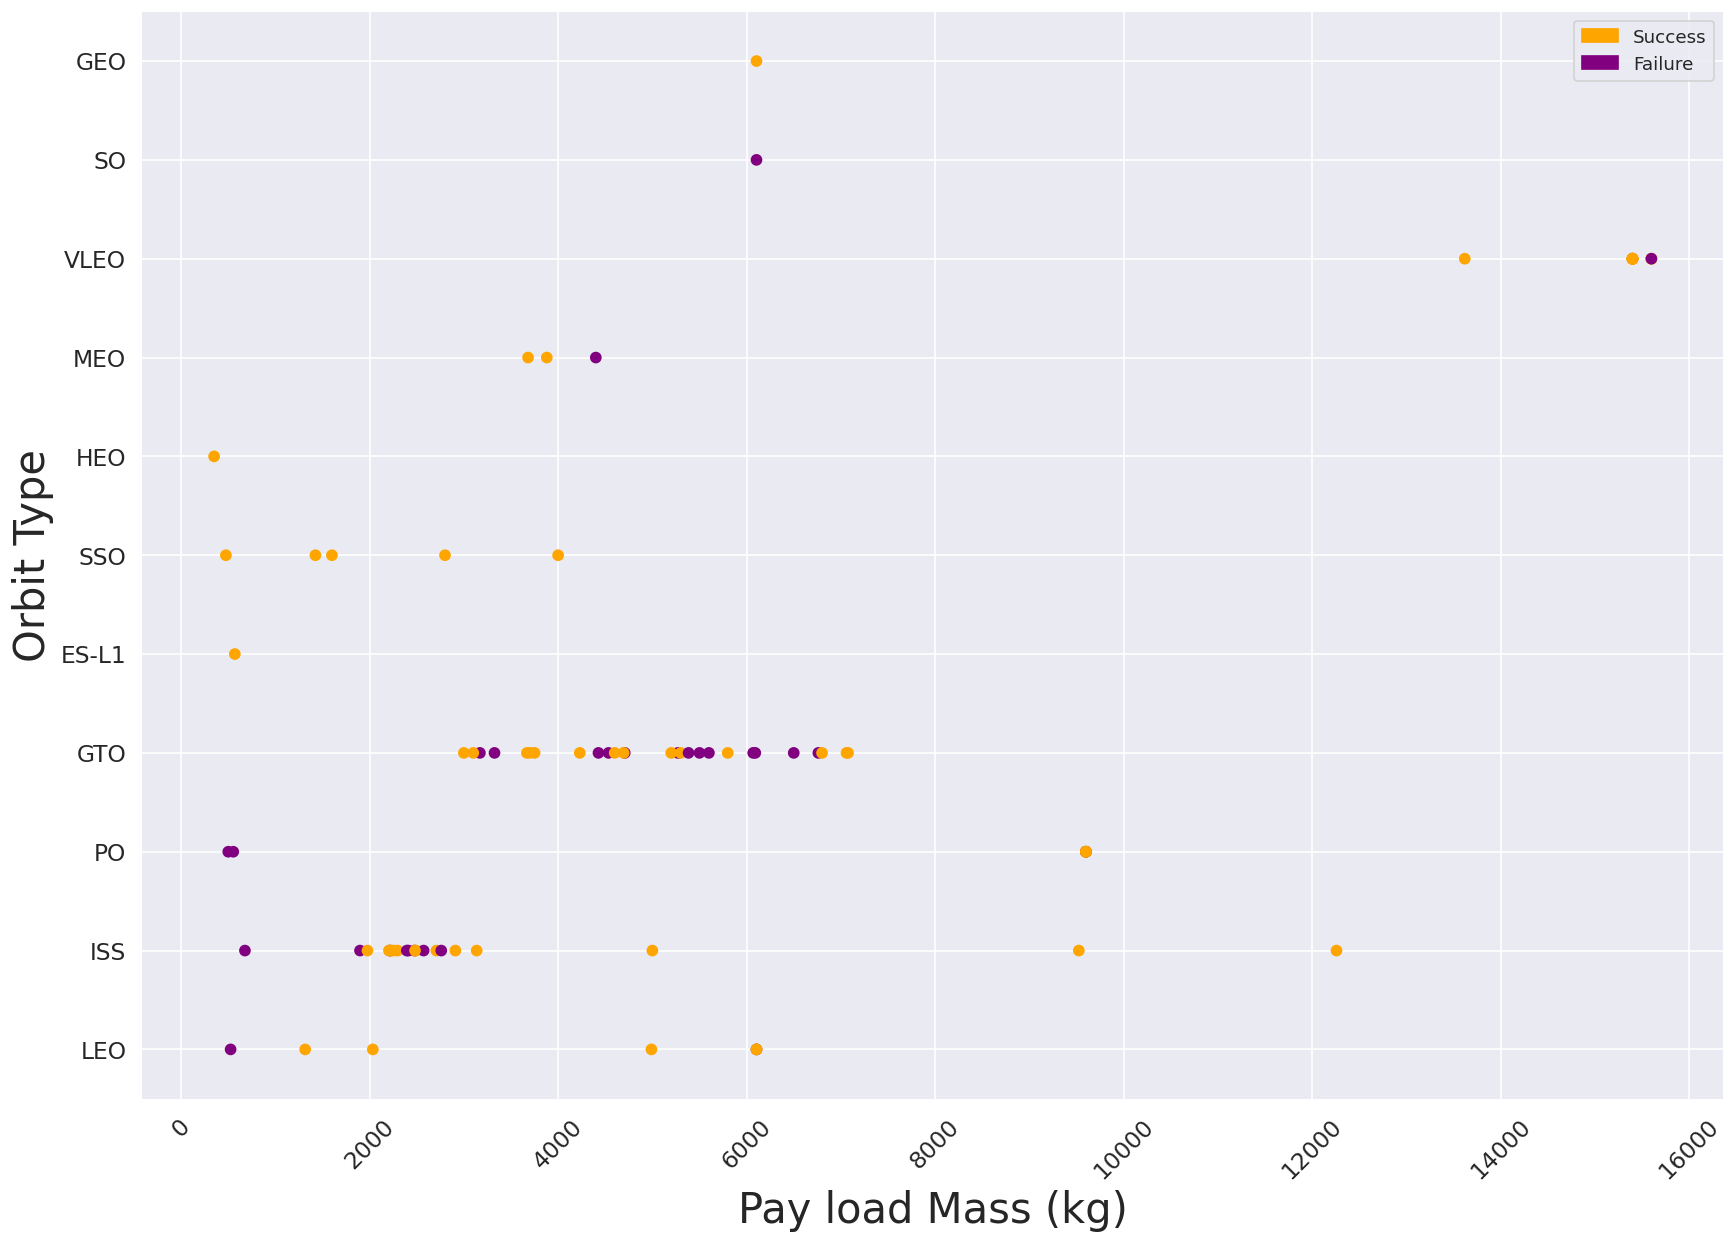

In [46]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
#sns.catplot(x='PayloadMass' , y='Orbit' ,hue="Class", data=df, aspect = 1)
plt.figure(figsize=(17, 12), dpi=120 ) 
plt.scatter(  df['PayloadMass'] , df['Orbit'] , color=df['Class_Color'] )
plt.ylabel("Orbit Type",fontsize=25) 
plt.xlabel("Pay load Mass (kg)",fontsize=25)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.legend(handles=[orange_patch, purple_patch])

for spine in plt.gca().spines.values():
  spine.set_visible(False)

plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [47]:
# A function to Extract years from the date 
# year=[]
# def Extract_year(date):
#     for i   in df["Date"]:
#         year.append(i.split("-")[0])
#     return year

# Extract_year(df['Year'])
# df.head(3)


you can observe that the sucess rate since 2013 kept increasing till 2020


## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [48]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK  7: Create dummy variables to categorical columns


In [54]:


features_one_hot = pd.get_dummies(features , columns= [ 'Orbit' , 'LaunchSite' , 'LandingPad' , 'Serial' ] )



Failure Rate (can also be obtained using 1 minus success rate )

In [73]:

# df_failed = df
# # df_failed['Class'].astype(int)
# df_failed['Class'] =  [1 if num == 0 else 0 for num in df_failed['Class'] ]


# df_failed['Year'].astype(int)

# df_failed_rate = df_failed.groupby(['Year'] , as_index= False )['Class'].mean()
# # df_failed_rate = df_failed_rate.loc[2:,:]
# df_failed_rate = df_failed_rate.tail(8) 

z = success_df
z['Failure_Rate'] = 1 - success_df['Class'] 

z 


KeyError: ignored

In [60]:
success_df =  df.groupby(['Year'] , as_index= False )['Class'].mean()
years = success_df['Year'].to_list()
success_df = success_df.tail(8) 
# success_df.reset_index()
success_df

,Year,Class
2,2013,0.000000
3,2014,0.333333
4,2015,0.333333
5,2016,0.625000
6,2017,0.833333
7,2018,0.611111
8,2019,0.900000
9,2020,0.842105


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [52]:
# HINT: Use get_dummies() function on the categorical columns


### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [55]:
# HINT: use astype function

features_one_hot.astype('float64')

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88.0,15400.000000,6.0,1.0,1.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


In [69]:
success_df

,Year,Class
2,2013,0.000000
3,2014,0.333333
4,2015,0.333333
5,2016,0.625000
6,2017,0.833333
7,2018,0.611111
8,2019,0.900000
9,2020,0.842105


# Visualizing Success And Failure Rate


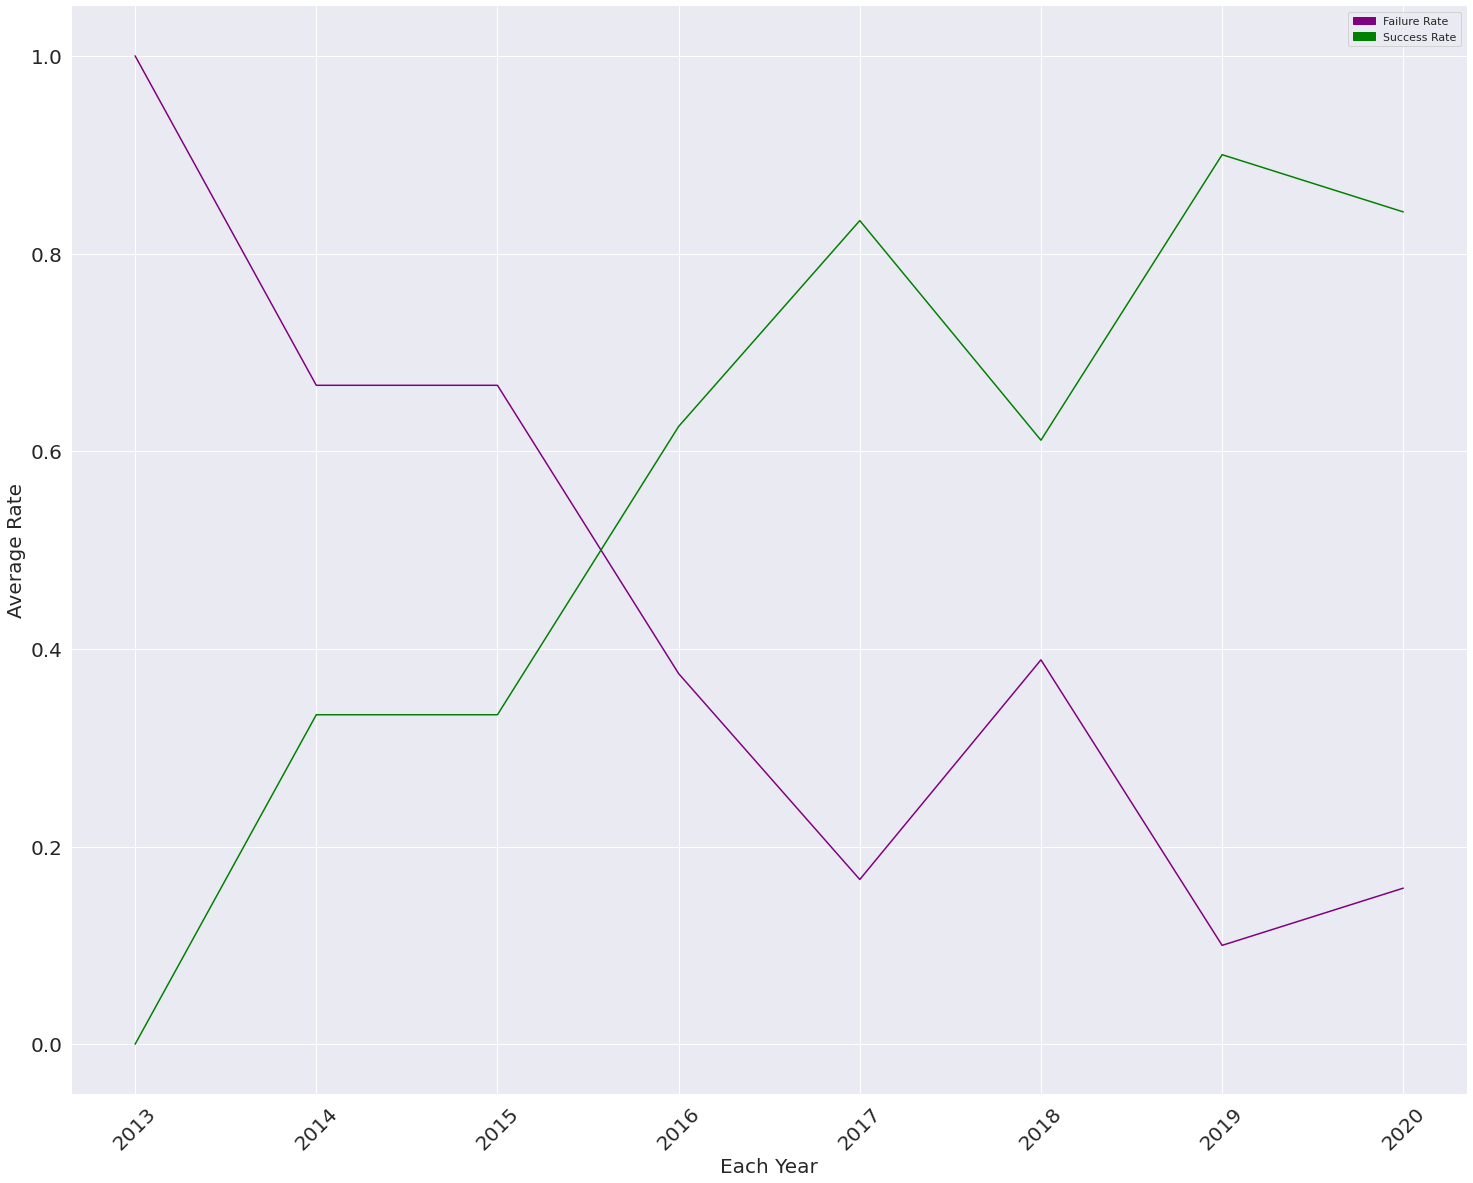

In [80]:
import seaborn as sns
sns.lineplot(x = 'Year' ,y = 'Failure_Rate' , data= rate , color= 'purple' )
sns.lineplot(x='Year' , y = 'Success_Rate' , data= rate , color= 'green' )

# Change figsize
# sns.set(rc={'figure.figsize':(25,20)}

# Data Labels
plt.xlabel('Each Year' ,fontsize=20)
plt.ylabel('Average Rate' , fontsize=20)

# Data Ticks
plt.yticks(fontsize=20)
plt.xticks(fontsize=20, rotation=45)


# add legend
fail_bar = mpatches.Patch(color='purple', label='Failure Rate')
success_bar = mpatches.Patch(color='green', label='Success Rate')
plt.legend(handles=[fail_bar, success_bar])

for spine in plt.gca().spines.values():
  spine.set_visible(False)

plt.show()


In [81]:
total =  sum(df['PayloadMass'])
num = len((df['PayloadMass']))
avg = total/num
avg

6104.959411764707

## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


<a href="https://www.linkedin.com/in/nayefaboutayoun/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01">Nayef Abou Tayoun</a> is a Data Scientist at IBM and pursuing a Master of Management in Artificial intelligence degree at Queen's University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By    | Change Description      |
| ----------------- | ------- | ------------- | ----------------------- |
| 2021-10-12        | 1.1     | Lakshmi Holla | Modified markdown       |
| 2020-09-20        | 1.0     | Joseph        | Modified Multiple Areas |
| 2020-11-10        | 1.1     | Nayef         | updating the input data |


Copyright © 2020 IBM Corporation. All rights reserved.
